In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from os import listdir
sessions_df = pd.read_csv("data_toolkit/data/sessions.csv")
practices_df = pd.read_csv("data_toolkit/data/practices.csv")
ccgs_df = pd.read_csv("data_toolkit/data/ccgs.csv")

In [3]:
sessions_df.count()

id                      128618
practice_id             128618
posted_datetime         128618
start_datetime          128618
end_datetime            128618
hourly_rate             128618
original_hourly_rate     87316
status                  128618
locum_id                 47732
dtype: int64

In [4]:
import datetime

length_seconds = lambda row: (row['end_datetime'] - row['start_datetime']).total_seconds()
one_hour = 60 * 60
is_short = lambda row: row['length_seconds'] <= 2 * one_hour
is_medium = lambda row: 2 * one_hour < row['length_seconds'] <= 4 * one_hour
is_long = lambda row: 4 * one_hour < row['length_seconds']


# These methods may exclude sessions that are very very long, but those
# appear to be outliers. Keeping it simple. 
def at_night(row): 
    return row['start_datetime'].time() >= datetime.time(18) or \
           row['end_datetime'].time() <= datetime.time(8)
   
   
def at_morning(row):
    start_in_morning = datetime.time(11) >= row['start_datetime'].time() >= datetime.time(6)
    end_in_morning = datetime.time(8) >= row['end_datetime'].time() >= datetime.time(12)
    if start_in_morning or end_in_morning:
        return True
    else:
        return False
    

def at_afternoon(row):
    start_in_aft = datetime.time(16) >= row['start_datetime'].time() > datetime.time(12)
    end_in_aft = datetime.time(20) >= row['end_datetime'].time() >= datetime.time(15)
    if start_in_aft or end_in_aft:
        return True
    else:
        return False

In [24]:
# Transform data
# Add new features that come from the session time
sessions_df['start_datetime'] = pd.to_datetime(sessions_df['start_datetime'])
sessions_df['end_datetime'] = pd.to_datetime(sessions_df['start_datetime'])

sessions_df['length_seconds'] = sessions_df[['start_datetime', 'end_datetime']].apply(
    length_seconds, axis=1
)
sessions_df['is_short'] = sessions_df[['length_seconds']].apply(
    is_short, axis=1
)
sessions_df['is_medium'] = sessions_df[['length_seconds']].apply(
    is_medium, axis=1
)
sessions_df['is_long'] = sessions_df[['length_seconds']].apply(
    is_long, axis=1
)

sessions_df['at_night'] = sessions_df[['start_datetime', 'end_datetime']].apply(
    at_night, axis=1
)
sessions_df['at_afternoon'] = sessions_df[['start_datetime', 'end_datetime']].apply(
    at_afternoon, axis=1
)
sessions_df['at_morning'] = sessions_df[['start_datetime', 'end_datetime']].apply(
    at_morning, axis=1
)

In [25]:
# Clean data
# We care about Completed / Filled / Expired sessions
clean_df = sessions_df[
    (sessions_df.status == 'completed') |
    (sessions_df.status == 'expired') |
    (sessions_df.status == 'filled')
]
clean_df['filled'] = clean_df[['status']].apply(
    lambda row: row['status'] in ['completed', 'expired'], axis=1
)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
display(clean_df.describe())

,id,practice_id,hourly_rate,original_hourly_rate,locum_id,length_seconds
count,7.187300e+04,7.187300e+04,71873.000000,56544.000000,4.391500e+04,71873.0
mean,3.686400e+08,2.139361e+06,81.944086,82.027766,1.522447e+07,0.0
std,1.033498e+08,1.279175e+06,7.199402,6.891379,5.001106e+07,0.0
min,4.016688e+07,3.011200e+04,60.000000,1.850000,2.011000e+04,0.0
25%,4.011212e+08,3.019170e+05,80.000000,80.000000,2.012139e+06,0.0
50%,4.011550e+08,3.011153e+06,80.000000,80.000000,2.013710e+06,0.0
75%,4.011850e+08,3.011767e+06,85.000000,85.000000,2.015509e+06,0.0
max,4.012203e+08,3.012808e+06,150.000000,150.000000,2.017111e+08,0.0


In [27]:
import matplotlib.pyplot as plt

rate_range = range(70, 130)


def print_count_graph(title, xs, filled, unfilled):
    ax = plt.subplot(111)
    filled_bar = ax.bar([x - 2 for x in xs], filled.values(), width=0.2, color='g', align='center')
    unfilled_bar = ax.bar([x + 0.2 - 2 for x in xs], unfilled.values(), width=0.2, color='r', align='center')
    ax.autoscale(tight=True)
    fig = ax.figure
    fig.set_size_inches((20, 10), forward=True)
    ax.set_ylabel("Number of sessions")
    ax.set_xlabel("Hourly rate")
    ax.legend((filled_bar, unfilled_bar), ("Filled sessions", "Unfilled sessions"))
    ax.set_xticks(xs)
    ax.set_title(title)
    plt.show()


def print_percentage_graph(title, xs, percentage, percentage_with_significance, percentage_with_great_significance):
    ax = plt.subplot(111)
    percentage_bar = ax.bar([x - 2 for x in xs], percentage.values(), width=0.75, color='lightgrey', align='center')
    percentage_with_significance_bar = ax.bar([x - 2 for x in xs], percentage_with_significance.values(), width=0.75, color='lightblue', align='center')
    percentage_with_great_significance_bar = ax.bar([x - 2 for x in xs], percentage_with_great_significance.values(), width=0.75, color='darkblue', align='center')
    ax.autoscale(tight=True)
    fig = ax.figure
    fig.set_size_inches((15, 5), forward=True)
    ax.set_ylabel("Fill %")
    ax.set_xlabel("Hourly rate")
    ax.set_title(title)
    ax.legend((percentage_bar, percentage_with_significance_bar, percentage_with_great_significance_bar), 
              ("Fewer than 100 sessions at this hourly rate", "Between 100-800 sessions with this hourly rate", "800+ sessions with this hourly rate"))
    plt.show()
    
    
def print_hourly_rate_graphs(df, title, print_count=True):
    unfilled_df = df[df['status'] == 'expired']
    unfilled = {}
    for i in rate_range:
        unfilled[i] = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
    filled_df = df[df['status'] != 'expired']
    filled = {}
    for i in rate_range:
        filled[i] = filled_df[filled_df['hourly_rate'] == i].count()[0]
        
    xs = list(rate_range)
    
    if print_count:
        print_count_graph(title, xs, filled, unfilled)

    percentage = {}
    for i in rate_range:
        unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
        filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
        if unfilled_count or filled_count:
            percentage[i] = filled_count / (unfilled_count + filled_count)
        else:
            percentage[i] = 0
            
    percentage_with_significance = {}
    for i in rate_range:
        unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
        filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
        if unfilled_count + filled_count > 100:
            percentage_with_significance[i] = filled_count / (unfilled_count + filled_count)
        else:
            percentage_with_significance[i] = 0
            
    percentage_with_great_significance = {}
    for i in rate_range:
        unfilled_count = unfilled_df[unfilled_df['hourly_rate'] == i].count()[0]
        filled_count = filled_df[filled_df['hourly_rate'] == i].count()[0]
        if unfilled_count + filled_count > 800:
            percentage_with_great_significance[i] = filled_count / (unfilled_count + filled_count)
        else:
            percentage_with_great_significance[i] = 0
            
    print_percentage_graph(title, xs, percentage, percentage_with_significance, percentage_with_great_significance)

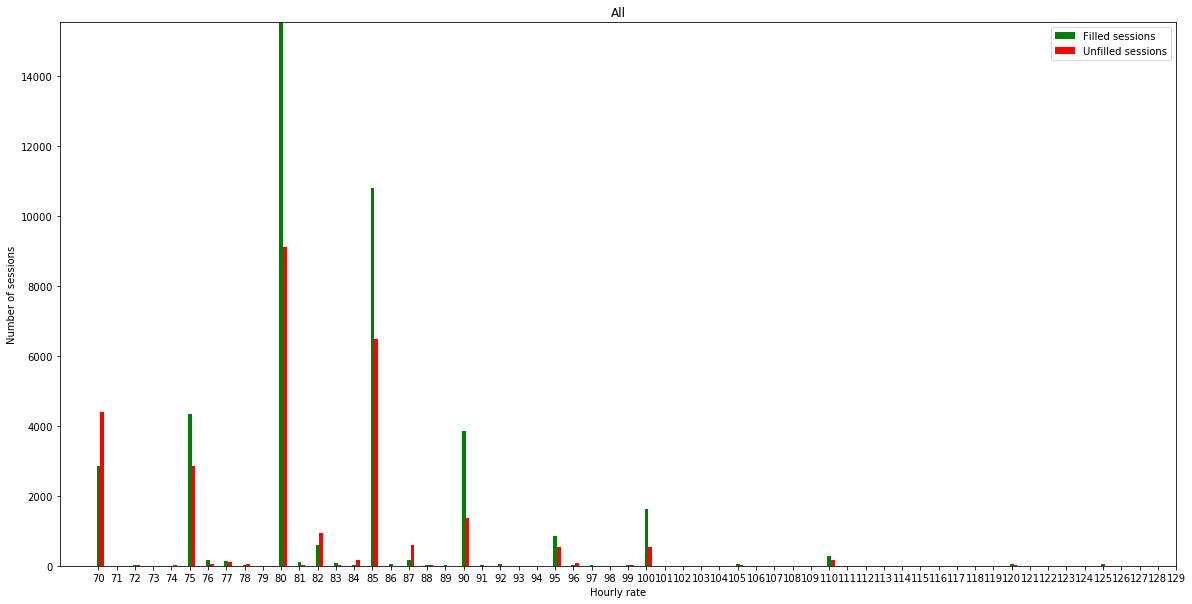

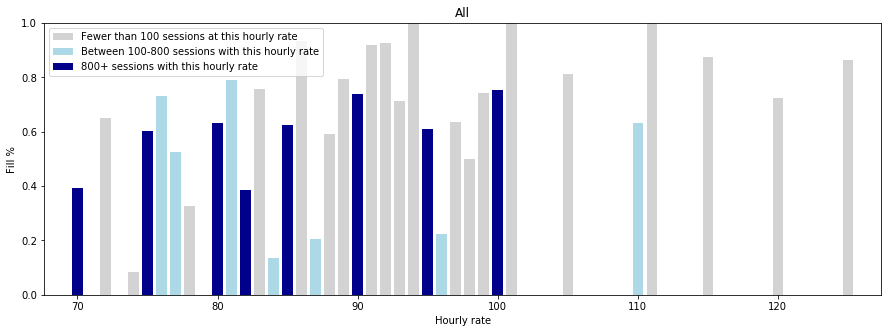

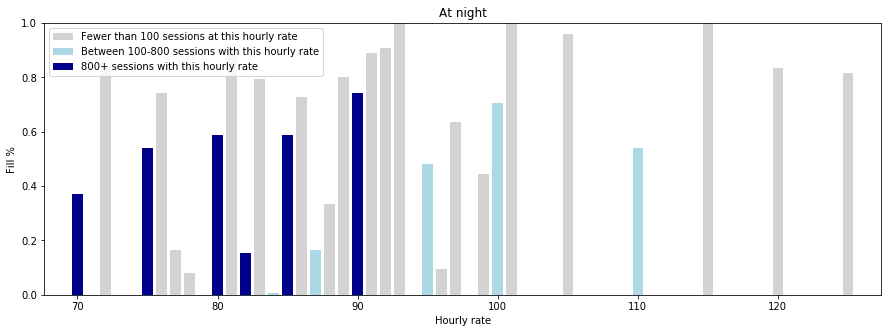

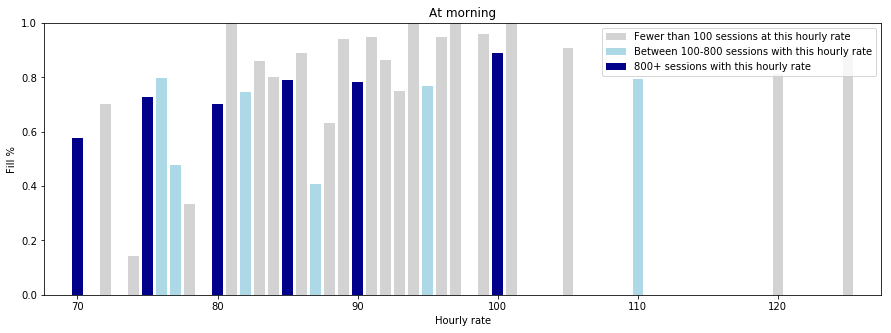

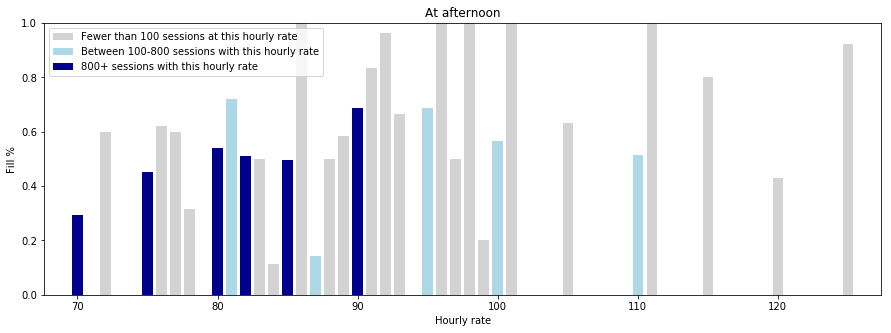

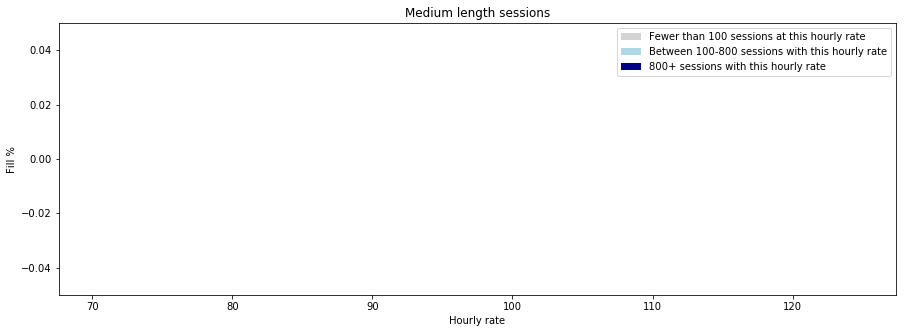

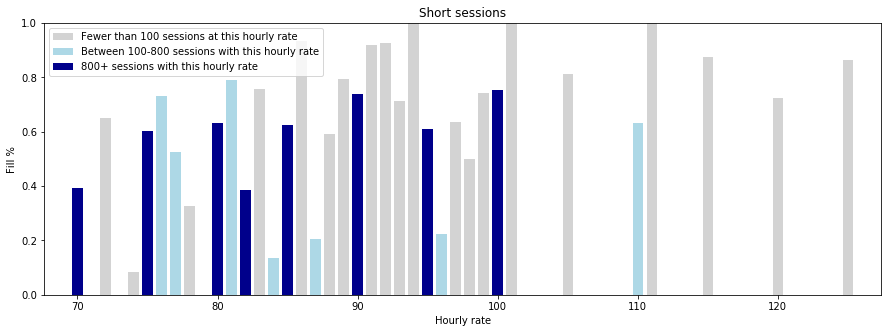

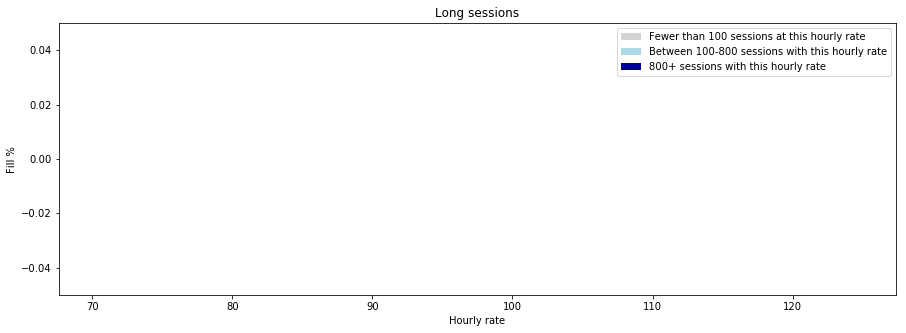

In [28]:
print_hourly_rate_graphs(clean_df, "All")

night_df = clean_df[clean_df['at_night'] == True]
print_hourly_rate_graphs(night_df, "At night", print_count=False)
morning_df = clean_df[clean_df['at_morning'] == True]
print_hourly_rate_graphs(morning_df, "At morning", print_count=False)
afternoon_df = clean_df[clean_df['at_afternoon'] == True]
print_hourly_rate_graphs(afternoon_df, "At afternoon", print_count=False)

medium_df = clean_df[clean_df['is_medium'] == True]
print_hourly_rate_graphs(medium_df, "Medium length sessions", print_count=False)
short_df = clean_df[clean_df['is_short'] == True]
print_hourly_rate_graphs(short_df, "Short sessions", print_count=False)
long_df = clean_df[clean_df['is_long'] == True]
print_hourly_rate_graphs(long_df, "Long sessions", print_count=False)

In [ ]:
print("Dependency Scores")
for column in sessions_df.columns:
    
    temp_df = sessions_df.drop(column, 1)
    
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        temp_df, sessions_df[''], 
        train_size=int(sessions_df[column].count() * 0.25), 
        random_state=1
    )
    
    # TODO: Create a decision tree regressor and fit it to the training se
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print("{} score: {}".format(str(column), score))